
# 第2章 感知机

配置环境：python 3.6

代码全部测试通过。

此文档方便阅读，若需要复制粘贴可以在当前目录中查看`perception.py`


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 产生数据
def generator_data():
    data = {
        'x': [],
        'y': []
    }
    # 固定随机数     
    np.random.seed(1)
    # 在 [0, 100] * [0, 100] 产生 100 个点
    x1 = np.random.randint(0, 100, 50)
    y1 = np.random.randint(0, 100, 50)
    # 在 [100, 200] * [100, 200] 产生 100 个点
    x2 = np.random.randint(100, 200, 50)
    y2 = np.random.randint(100, 200, 50)
    
    # 将两个数组结合在一起     
    point_x = np.hstack((x1, x2))
    point_y = np.hstack((y1, y2))
    # 标明类别
    for i in range(100):
        data['x'].append((point_x[i], point_y[i]))
        if(i < 50):
            data['y'].append(-1)
        else:
            data['y'].append(1)
    # 画图 plt.show() 之后才能画出来
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)

    return data

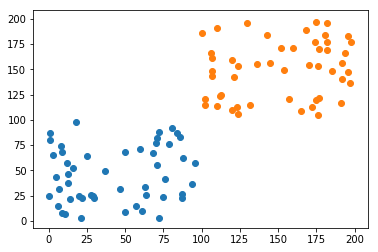

In [5]:
data = generator_data()

In [31]:
class Perceptron(object):
    def load_data(self, data):
        # 保存数据
        self.data = data
    # 初始化参数
    def init_args(self):
        data = self.data
        # x 形如 (x1, x2)
        self.x = data['x']
        # 标签
        self.y = data['y']
        # 初始化权重
        self.w = np.ones(2)
        # 初始化偏置
        self.b = 1
        # 初始化学习率
        self.lr = 0.1
    
    # 更新参数
    def update(self, x, y):
        # 书上公式 2.6 2.7
        self.w += self.lr * np.dot(y, x)
        self.b += self.lr * y
    
    # 判断是否是误分类点
    def judge(self, x, y):
        # 书上公式 2.1 (3)
        w = self.w
        t = np.dot(w, x) + self.b
        if t * y <= 0:
            return True
        return False

    def train(self):
        """
        算法 2.1
        """
        tran_len = len(self.x)
        wrong_sample = True
        wrong_sample_num = 0
        while wrong_sample:
            wrong_sample_num = 0
            # 遍历所有的点
            for i in range(tran_len):
                # 判断是不是误分类点
                if self.judge(self.x[i], self.y[i]):
                    self.update(self.x[i], self.y[i])
                    wrong_sample_num += 1
            # 没有误分类点
            if not wrong_sample_num:
                wrong_sample = False
        print('train done!')
        return self.w, self.b

In [32]:
p = Perceptron()
p.load_data(data)
p.init_args()
w, b = p.train()

train done!


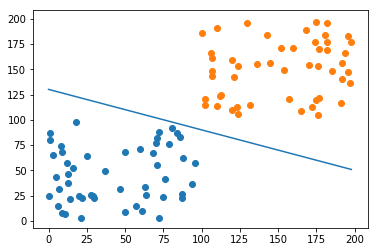

In [35]:
# 画出所有待分类的点
plt.scatter([i[0] for i in data['x'][0:50]], [i[1] for i in data['x'][0:50]])
plt.scatter([i[0] for i in data['x'][50:]], [i[1] for i in data['x'][50:]])

# 画出分隔直线
_min = min(data['x'], key=lambda x: x[0])[0]
_max = max(data['x'], key=lambda x: x[0])[0]
X = np.arange(_min, _max, 0.1)
y = (-w[0]*X - b) / w[1]
plt.plot(X, y)
plt.show()